# Implementing Neural Network with single Neuron (or Logistic Regression) From Scratch!!!

This Notebook is an effort to understand the underlying working of a simple neuron. In doing so, we will create a custom neural network class and compare it with existing Neural network libraries (preferably TensorFlow) to verify our results.

## Dataset

For the purpose of this notebook, we will be using a very simple insurance dataset. Note that this is a dummy dataset created for the purpose of the demonstration of this notebook. This dataset has 2 features, `age` and `affordibility`. This indicate the age of the customer in years, and their affordibility to buy an insurance plan (0 is not affordable, and 1 is affordable). The binary target column is `bought_insurance`, that indicates whether the customer bought an insurance plan (1) or not (0). Quite simple, easy, and straight-forward!

## Idea

If we notice, this is a simple binary classification problem, and can be easily solved by logistic regression. Basically, that is the whole inspiration for a single neuron that I'm trying to build here from scratch. Logistic regression contains a sigmoid function which can be treated as an activation function for the linear equation of target and features.   

Please refer to the diagram below:   

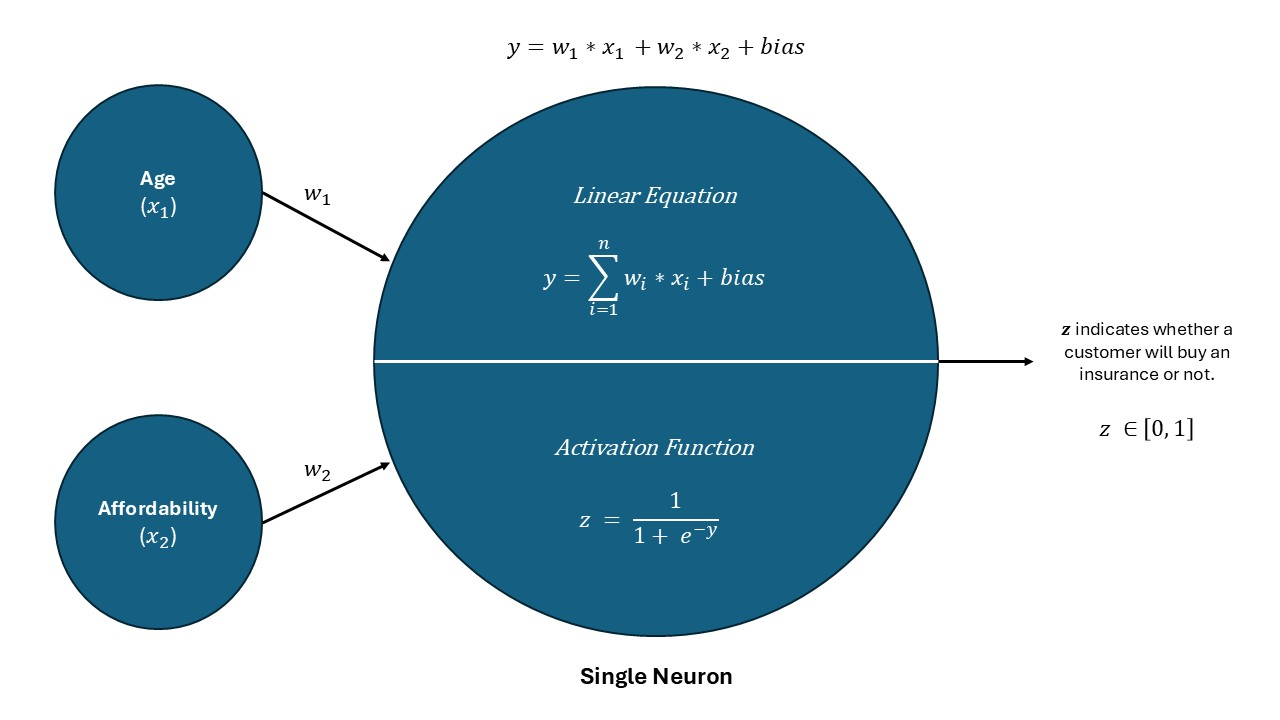   

With this idea, I intend to develop a single neuron neural network from scratch. Let's begin, and I will explain the further details as we go ahead.



## Initializing Benchmark 

Now before we start creating the NN from scratch, let's do it the conventional way, using Tensorflow (Keras), to set a benchmark for the weight & bias values for our model.

In [1]:
# Importing primary libraries.
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Folder containing dummy data.
data_folder_path = os.path.join(os.getcwd(), "data")

# Creating dataframe.
df = pd.read_csv(os.path.join(data_folder_path, "dummy_insurance_data.csv"))

# Check data.
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [3]:
# Splitting the train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["age","affordibility"]], df["bought_insurance"], test_size=0.2, random_state=42)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (22, 2)
X_test Shape: (6, 2)
y_train Shape: (22,)
y_test Shape: (6,)


One thing we can do here is, Scale the data. As the `age` values are in different scale than `affordability` values. 

In [4]:
# Using MinMaxScaler to bring values around 0 and 1.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

# For training data.
X_train["age"] = mms.fit_transform(X_train[["age"]])

# For testing data.
X_test["age"] = mms.transform(X_test[["age"]])

In [5]:
X_train.head()

,age,affordibility
17,0.952381,1
22,0.523810,1
11,0.238095,1
13,0.261905,0
15,0.880952,1


In [6]:
X_test.head()

,age,affordibility
9,1.023810,1
25,0.857143,1
8,1.047619,1
21,0.190476,0
0,0.095238,1


Now, let's build a sigle neuron NN model in TensorFlow (Keras) to get benchmark values for weights and bias. We'll replicate the model as shown in the digram. Attaching again for reference.  

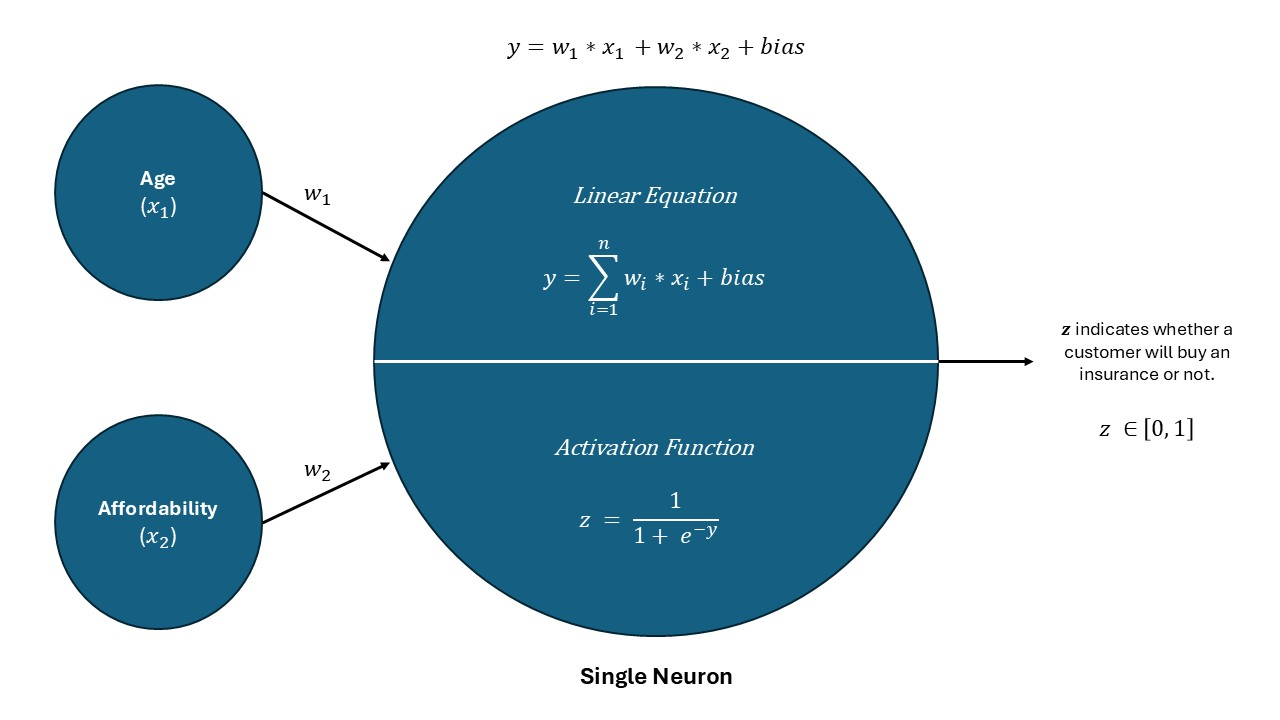

In [7]:
# Benchmark model.
# Initializing with weights as 1 and bias as 0.
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros")
])

# Compiling the model.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Training the model.
model.fit(X_train, y_train, epochs=1500)


Epoch 1/1500


1/1 [==============================] - 1s 1s/step - loss: 0.7194 - accuracy: 0.5000
Epoch 2/1500
1/1 [==============================] - 0s 12ms/step - loss: 0.6790 - accuracy: 0.5455
Epoch 3/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.6492 - accuracy: 0.5455
Epoch 4/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 0.5909
Epoch 5/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.6125 - accuracy: 0.5909
Epoch 6/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.6015 - accuracy: 0.5909
Epoch 7/1500
1/1 [==============================] - 0s 0s/step - loss: 0.5935 - accuracy: 0.5909
Epoch 8/1500
1/1 [==============================] - 0s 0s/step - loss: 0.5875 - accuracy: 0.5909
Epoch 9/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.5828 - accuracy: 0.5909
Epoch 10/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.5789 - accuracy: 0.6818
Epoch 11/1500
1/1

Awesome, let's evaluate the model on test set

In [8]:
# Evluating the model on test set.
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 232ms/step - loss: 0.0859 - accuracy: 1.0000


[0.08590223640203476, 1.0]

Looks good! Let's predict on test set and view the predictions and then we can check the benchmark values for weights and bias.

In [9]:
# Predition on test set.
model.predict(X_test)

1/1 [==============================] - 0s 173ms/step


array([[0.9487693 ],
       [0.8926152 ],
       [0.95405465],
       [0.05004371],
       [0.17589875],
       [0.05577295]], dtype=float32)

## Benchmark Values for Weights and Bias

In [10]:
# Weights and bias values from model.
coef, intercept = model.get_weights()

# Printing benchmark values.
for i, v in enumerate(coef):
    print("w{} = {}".format(i+1, v[0]))
print("bias =", intercept[0])

w1 = 4.806535243988037
w2 = 1.8568992614746094
bias = -3.8590496


Perfect! We have the values for weights and bias. Now we can start building our NN from scratch, and check if our custom values for weights and bias match the benchmark values or not.

## Developing NN from Scratch!

Okay, to build this single neuron NN from scratch, we need to focus on developing the following underlying things:  
1) Prediction function
2) Activation function (Sigmoid)
3) Loss function
4) Gradient descent

In case of TensorFlow, all of these things were handled internally, through our parameter input values. Let's try using plain python! To do this, we'll create a class with all the required functionalities like fit and predict. But before, let's write some helper functions.

In [11]:
# Function to apply sigmoid function to target array.
def numpy_sigmoid(y):
    z = 1/(1+np.exp(-y))
    return z

# Function to implement binary crossentropy cost funciton (log loss).
def log_loss(y_true, y_predicted):
    # To prevent log(0) situation.
    epsilon = 1e-15

    # Clipping the values to lower epsilon and upper 1-epsilon. 
    # If 0, will turn to epsilon; if 1, will turn to 1-epsilon.
    y_predicted_new = np.clip(y_predicted, epsilon, 1-epsilon) 

    # Converting into numpy arrays.
    y_true = np.array(y_true)
    y_predicted_new = np.array(y_predicted_new)

    # log loss formula.
    loss = -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))  
    return loss

Let's build the actual class now!

In [12]:
# Name of the class.
class CustomNN:
    def __init__(self, learning_rate=0.5):
        # Initializing with default values.
        self.weights = None
        self.bias = 0
        self.learning_rate = learning_rate

    # Function to fit the model and start training.
    def fit(self, X, y, epochs, loss_thresold):        
        # Implementing gradient descent for training.
        self.weights, self.bias = self.gradient_descent(X, y, epochs, loss_thresold)
        print("\nFinal weights = {}, bias = {}".format(self.weights, self.bias))
        
    def predict(self, X_test):
        # Ensuring it's a NumPy array.
        X_test = X_test.values
        
        weighted_sum = np.dot(X_test, self.weights) + self.bias
        y_test_pred = numpy_sigmoid(weighted_sum)
        return y_test_pred

    # Function to implement gradient descent for Backward error propogation.
    def gradient_descent(self, X, y_true, epochs, loss_thresold):
        # Ensuring it's a NumPy array.
        X = X.values  

        # Shape to get rows and columns.
        n_samples, n_features = X.shape

        # Initializing weights as 1. 
        # For our case, this should create w1 & w2 inside w.
        w = np.ones(n_features)

        # Default values.
        bias = 0
        rate = self.learning_rate

        # Iterating for number of epochs.
        for i in range(epochs):
            # Linear function.
            weighted_sum = np.dot(X, w) + bias

            # Activation funtion (Sigmoid).
            y_predicted = numpy_sigmoid(weighted_sum)

            # Binary-crossentropy loss.
            loss = log_loss(y_true, y_predicted)

            # This is the actual backward error propogation.
            # We're taking partial derivatives of loss wrt each weight.
            dw = (1 / n_samples) * np.dot(np.transpose(X), (y_predicted - y_true))

            # This is just the average of the prediction error, gradient of the bias term.
            db = np.mean(y_predicted - y_true)

            # Updating with learning rate.
            # We have a minus sign here to balance the sign of (y_pred - y_true).
            w = w - rate * dw
            bias = bias - rate * db

            # Getting Accuracy.
            # Convert predicted probabilities to class labels (0 or 1).
            y_pred_label = (y_predicted >= 0.5).astype(int)
            
            # Accuracy = number of correct predictions / total.
            accuracy = np.mean(y_pred_label == y_true)
            
            # printing after every 50th iteration.
            if i%50==0:
                print(f"Epoch:{i}> weights:{w} | bias:{bias} | loss:{loss} | accuracy:{accuracy:.5f}")

            # Stop loss.
            if loss <= loss_thresold:
                print(f"Epoch:{i}> weights:{w} | bias:{bias} | loss:{loss} | accuracy:{accuracy:.5f}")
                break

        return w, bias

For the backward error propogation, we considered the partial derivatives of the loss function with respect to each weight 𝑤_𝑗
​


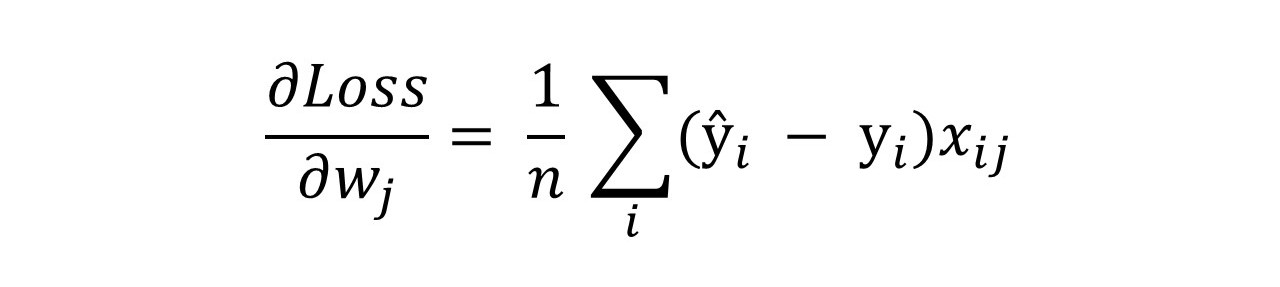

In [13]:
customModel = CustomNN(learning_rate=0.5)
customModel.fit(X_train, y_train, epochs=1500, loss_thresold=0.1)

Epoch:0> weights:[0.97748234 0.92637842] | bias:-0.12553712175792717 | loss:0.7193715543981021 | accuracy:0.50000
Epoch:50> weights:[1.948559   0.77471364] | bias:-1.4106271580658118 | loss:0.5094611026754378 | accuracy:0.81818
Epoch:100> weights:[2.68956469 0.95771784] | bias:-1.9565423864215896 | loss:0.4732804489621873 | accuracy:0.81818
Epoch:150> weights:[3.1782825  1.11251731] | bias:-2.347031301503152 | loss:0.45632811324593126 | accuracy:0.81818
Epoch:200> weights:[3.52169919 1.24086618] | bias:-2.639216079251286 | loss:0.4473925790530171 | accuracy:0.81818
Epoch:250> weights:[3.77456881 1.34649908] | bias:-2.8645428696370803 | loss:0.442288027766757 | accuracy:0.81818
Epoch:300> weights:[3.9672785  1.43326941] | bias:-3.042036939035985 | loss:0.4392043079341519 | accuracy:0.81818
Epoch:350> weights:[4.11791742 1.50460762] | bias:-3.1840489971349943 | loss:0.43726539407303394 | accuracy:0.81818
Epoch:400> weights:[4.23791514 1.56339601] | bias:-3.2990269327857398 | loss:0.43600

## Comparing Custom NN model & conventional TF model coefficients & Bias

In [14]:
# Printing CustomNN values.
for i, v in enumerate(customModel.weights):
    print("w{} = {}".format(i+1, v))
print("bias =", customModel.bias)

w1 = 4.806535372032641
w2 = 1.8568993426033957
bias = -3.8590495341012394


In [15]:
# Printing benchmark values.
for i, v in enumerate(coef):
    print("w{} = {}".format(i+1, v[0]))
print("bias =", intercept[0])

w1 = 4.806535243988037
w2 = 1.8568992614746094
bias = -3.8590496


Perfect!! This shows that in the end we were able to come up with same value for w1, w2, and bias using a plain python implementation of gradient descent function. 

## Predictions on Test Set

In [16]:
X_test

,age,affordibility
9,1.023810,1
25,0.857143,1
8,1.047619,1
21,0.190476,0
0,0.095238,1
12,0.214286,0


### Predict using custom NN model

In [17]:
cm_preds = customModel.predict(X_test)

### Predict using TensorFlow model

In [18]:
tf_preds = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


### Plotting the Predictions

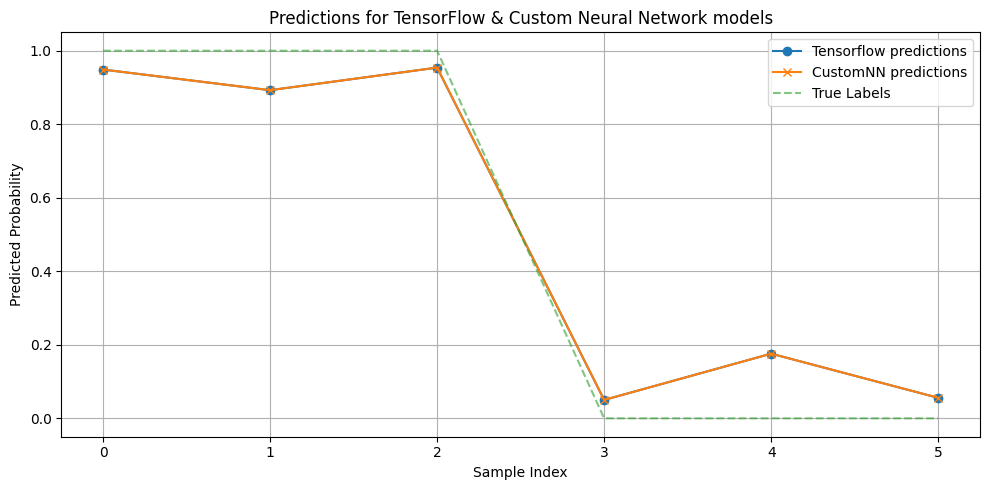

In [19]:
plt.figure(figsize=(10, 5))

plt.plot(tf_preds, label="Tensorflow predictions", marker="o")
plt.plot(cm_preds, label="CustomNN predictions", marker="x")
plt.plot(y_test.values, label='True Labels', linestyle='--', alpha=0.6) 

plt.title("Predictions for TensorFlow & Custom Neural Network models")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In the above plot, we can compare predictions from our own customNN model and the TensorFlow model. We can clearly see that the predictions are pretty much same for both, as they are overlapping.

So that is how we successfully created a single neuron Neural Network from scratch!

<b><center>*****</center></b>